## Project 10: Visualization of COVID data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
#covid.head()
#covid.shape
#covid.dtypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
covid.tail()
#covid.shape
#covid.dtypes

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [ ]:
covid.dtypes

In [ ]:
# Date is object type, need to conver it to datetime format
import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv',
                     parse_dates = ['Date'])
covid1.dtypes
# covid1.head()

,0
Date,datetime64[ns]
Country,object
Confirmed,int64
Recovered,int64
Deaths,int64


In [ ]:
covid1.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
covid1['Country']

,Country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
161563,Zimbabwe
161564,Zimbabwe
161565,Zimbabwe
161566,Zimbabwe


In [ ]:
covid['Ratio'] = covid['Confirmed']/covid['Deaths']
covid.tail()

,Date,Country,Confirmed,Recovered,Deaths,Ratio
161563,2022-04-12,Zimbabwe,247094,0,5460,45.255311
161564,2022-04-13,Zimbabwe,247160,0,5460,45.267399
161565,2022-04-14,Zimbabwe,247208,0,5462,45.259612
161566,2022-04-15,Zimbabwe,247237,0,5462,45.264921
161567,2022-04-16,Zimbabwe,247237,0,5462,45.264921


In [ ]:
# Sum of total cases -> creating a new column
covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
covid1.tail()

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
161563,2022-04-12,Zimbabwe,247094,0,5460,252554
161564,2022-04-13,Zimbabwe,247160,0,5460,252620
161565,2022-04-14,Zimbabwe,247208,0,5462,252670
161566,2022-04-15,Zimbabwe,247237,0,5462,252699
161567,2022-04-16,Zimbabwe,247237,0,5462,252699


In [ ]:
worldwide = covid1.groupby(['Date']).sum()

In [ ]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 2020-01-22 to 2022-04-16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          816 non-null    object
 1   Confirmed        816 non-null    int64 
 2   Recovered        816 non-null    int64 
 3   Deaths           816 non-null    int64 
 4   Total Confirmed  816 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.2+ KB


In [ ]:
worldwide.tail()

,Country,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,,
2022-04-12,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,500880363,0,6185040,507065403
2022-04-13,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,501920234,0,6189593,508109827
2022-04-14,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,502892186,0,6193401,509085587
2022-04-15,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,503606396,0,6195647,509802043
2022-04-16,AfghanistanAlbaniaAlgeriaAndorraAngolaAntarcti...,504155459,0,6197159,510352618


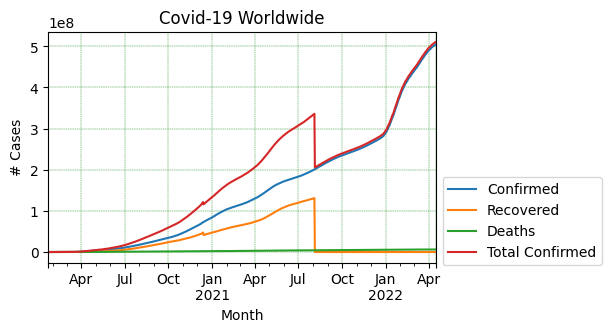

In [ ]:
# Plotting for wordlwide cases
worldwide = covid1.groupby(['Date']).sum()
c = worldwide.plot(figsize = (5, 3))
c.set_xlabel('Month')
c.set_ylabel('# Cases')
c.title.set_text('Covid-19 Worldwide')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [ ]:
Italy = covid1[covid1['Country'] =='Italy']

In [ ]:
Italy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 70176 to 70991
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             816 non-null    datetime64[ns]
 1   Country          816 non-null    object        
 2   Confirmed        816 non-null    int64         
 3   Recovered        816 non-null    int64         
 4   Deaths           816 non-null    int64         
 5   Total Confirmed  816 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 44.6+ KB


In [ ]:
Italy = covid1[covid1['Country'] =='Italy'].groupby(['Date']).sum()
Italy.tail()

,Country,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,,
2022-04-12,Italy,15404809,0,161032,15565841
2022-04-13,Italy,15467395,0,161187,15628582
2022-04-14,Italy,15533012,0,161336,15694348
2022-04-15,Italy,15595302,0,161469,15756771
2022-04-16,Italy,15659835,0,161602,15821437


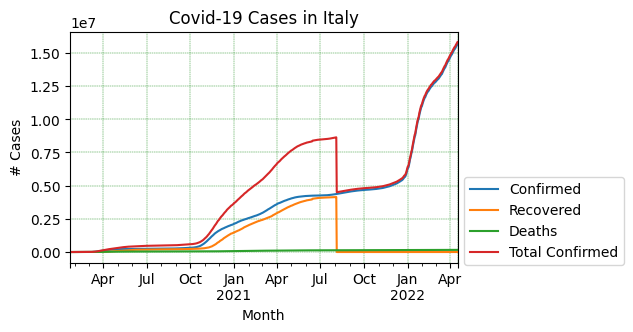

In [ ]:
I = Italy.plot(figsize = (5, 3))
I.set_xlabel('Month')
I.set_ylabel('# Cases')
I.title.set_text('Covid-19 Cases in Italy')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [ ]:
day = '2022-04-16'
last_covid=covid1[covid1['Date']==day ]
top_10=last_covid.sort_values(['Confirmed'],ascending=False)[:10]

In [ ]:
last_covid

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
815,2022-04-16,Afghanistan,178387,0,7676,186063
1631,2022-04-16,Albania,274462,0,3496,277958
2447,2022-04-16,Algeria,265739,0,6874,272613
3263,2022-04-16,Andorra,40709,0,153,40862
4079,2022-04-16,Angola,99194,0,1900,101094
...,...,...,...,...,...,...
158303,2022-04-16,West Bank and Gaza,656617,0,5656,662273
159119,2022-04-16,Winter Olympics 2022,535,0,0,535
159935,2022-04-16,Yemen,11817,0,2148,13965
160751,2022-04-16,Zambia,318467,0,3973,322440


In [ ]:
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
150143,2022-04-16,US,80625120,0,988609,81613729
66095,2022-04-16,India,43042097,0,521751,43563848
20399,2022-04-16,Brazil,30250077,0,662185,30912262
52223,2022-04-16,France,27874269,0,145159,28019428
55487,2022-04-16,Germany,23416663,0,132942,23549605
153407,2022-04-16,United Kingdom,21916961,0,172014,22088975
119135,2022-04-16,Russia,17801103,0,365774,18166877
76703,2022-04-16,"Korea, South",16305752,0,21092,16326844
70991,2022-04-16,Italy,15659835,0,161602,15821437
149327,2022-04-16,Turkey,14991669,0,98551,15090220


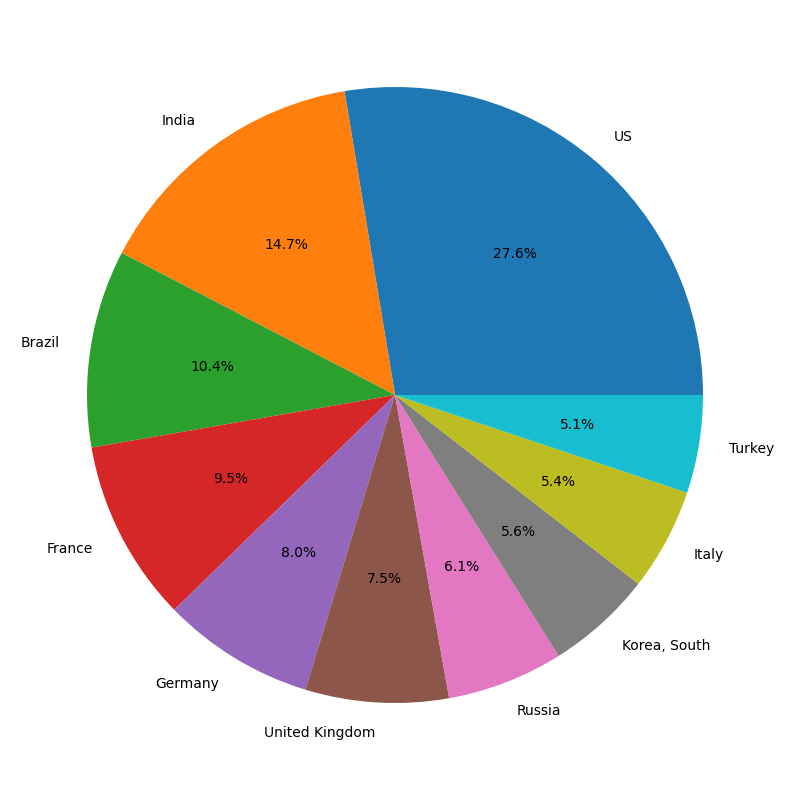

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot()
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%');

##Project 11: Solution of ODE or system of ODEs

**Skills.**

* <code>solve_ivp</code> function
* style of the plot

### SIR model

**Problem.** A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:

* $S(t)$ are those susceptible but not yet infected with the disease;
* $I(t)$ is the number of infectious individuals;
* $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

The SIR model describes the change in the population of each of these compartments in terms of two parameters $\beta$ and $\gamma$. $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $\gamma$ is the mean recovery rate: that is, $1/\gamma$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model are

$$
\frac{dS}{dt}=-\frac{\beta S I}{N}, \\
\frac{dI}{dt}=\frac{\beta S I}{N}-\gamma I, \\
\frac{dR}{dt}=\gamma I.
$$

Simulate the dynamics for $\beta=0.2, 1/\gamma=10 \textrm{days}$ in a population of $N=1000$. The model is started with a single infected individual on day $0$ *i.e.* $I(0)=1$.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./10

# The SIR model differential equations.
def SIR(t, y, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = [S0, I0, R0]

# Timespan
ts = [0,160]

# Evaluation times
tt = np.linspace(0,160,160)

# Integrate the SIR equations over the time span [0,160].
sol = solve_ivp(SIR, ts, y0, t_eval=tt, args=(N, beta, gamma))

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.006e+00 ...  1.590e+02  1.600e+02]
        y: [[ 9.990e+02  9.984e+02 ...  6.960e+00  6.960e+00]
            [ 1.000e+00  1.495e+00 ...  1.262e-03  1.145e-03]
            [ 0.000e+00  1.239e-01 ...  9.930e+02  9.930e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 152
     njev: 0
      nlu: 0

In [ ]:
np.shape(sol.y)

(3, 160)

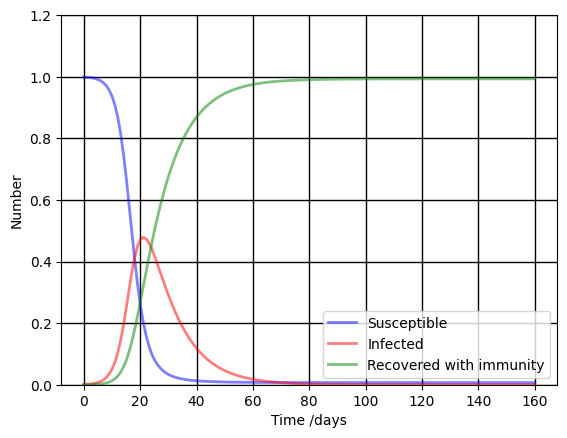

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0]/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(sol.t, sol.y[1]/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(sol.t, sol.y[2]/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0,1.2)
ax.grid(c='k', lw=1, ls='-')

legend = ax.legend()
plt.show()

### Lotka Volterra model

**Problem.** The model describes the variation in populations of two species which interact via predation. The equations are as follows
$$
\dot{x}=\frac{dx}{dt}=x(\alpha-\beta y) \\
\dot{y}=\frac{dy}{dt}=y(-\delta+\gamma x),
$$
where $\alpha, \beta, \gamma$ and $\delta$ are positive constants.
Suppose to consider the initial conditions $x(0)=4, y(0)=2$.
To start consider the case $\alpha=\beta=\gamma=\delta=1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
alpha = 1.5
beta = 1.
delta = 3.
gamma = 1.

def LV(t, X, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return dotx, doty

# Initial conditions vector
X0 = [1,1]

# Timespan
ts = [0,30]

# Evaluation times
tt = np.linspace(0,30,1000)

sol = solve_ivp(LV, ts, X0, t_eval=tt, args = (alpha, beta, delta, gamma))

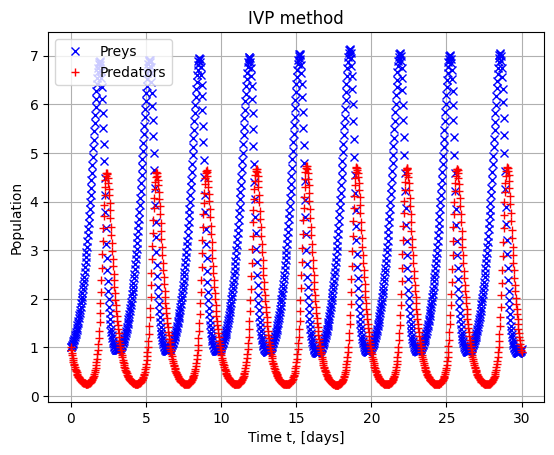

In [ ]:
plt.figure()
plt.grid()
plt.title("IVP method")
plt.plot(sol.t, sol.y[0], 'xb', label = 'Preys')
plt.plot(sol.t, sol.y[1], '+r', label = "Predators")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

Let us now plot on the phase space.

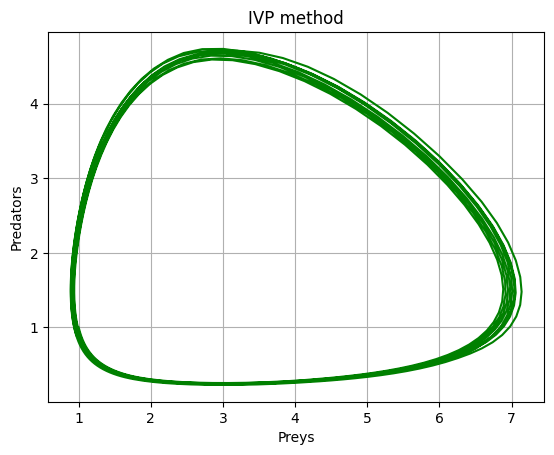

In [ ]:
plt.figure()
plt.grid()
plt.title("IVP method")
plt.plot(sol.y[0], sol.y[1], 'g')
plt.xlabel('Preys')
plt.ylabel('Predators')

plt.show()

**Exercise.** A cosmetics manufacturer has a marketing policy based upon the price
$x(t)$ of its salon shampoo.
The production $P(t)$ and the sales $S(t)$ are given in terms of the price
$x(t)$ and the change in price $\dot{x}(t)$ by the equations

$$
P(t) = 4- \frac{3}{4}x(t) − 8\dot{x}(t) \qquad \textrm{(Production)}, \\
S(t) = 15 − 4x(t) − 2\dot{x}(t) \qquad \textrm{(Sales)}.
$$

The differential equations for the price $x(t)$ and inventory level $I(t)$ are
$$
\dot{x}(t) = k(I(t) − I_0), \\
\dot{I}(t) = P(t) − S(t).
$$

The inventory level $I_0 = 50$ represents the desired level. The equations
can be written in terms of $x(t)$ and $I(t)$ as follows:
$$
\dot{x}(t) = kI(t) − kI_0, \\
\dot{I}(t) = \frac{13}{4}x(t) − 6kI(t) + 6 k I_0 − 11.
$$

Solve the system for $k = 1, x(0) = 10$ and $I(0) = 7$.

In [ ]:
I0 = 50
k = 1.

def cosm(t, y, I0, k):
    x, I = y
    dotx = k * (I - I0)
    dotI = 13/4*x-6*k*I+6*k*I0-11
    return dotx, dotI

# Initial conditions vector
y0 = [10,7]

# Timespan
ts = [0,5]

# Evaluation times
tt = np.linspace(0,5,100)

sol = solve_ivp(cosm, ts, y0, t_eval=tt, args = (I0,k))

In [ ]:
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.plot(sol.t, sol.y[0], 'b', label = 'Price')
ax1.set_ylabel('Price', color=color)
ax1.set_xlabel('Time')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(sol.t, sol.y[1], 'r', label = "Stock")
ax2.set_ylabel('Stock',color=color)

fig.legend(loc=2)
plt.show()

In [ ]:
sol

##Project 12: Laplace problem in 1D

Here we will solve the equation

$$u^{\prime\prime} = f(x)$$

with $f(x) = \sin(x)$, and the domain $x \in [0, 2\pi]$, with boundary conditions $u(0) = u(2\pi) = 0$.  The solution is simply $u(x) = -\sin(x)$.

We will use a grid of $N$ points with $x_0$ on the left boundary and $x_{N-1}$ on the right boundary.

We difference our equation according to the finite differences scheme, namely

$$\frac{u_{i+1} - 2 u_i + u_{i-1}}{\Delta x^2} = f_i$$

We keep the boundary points fixed, so we only need to solve for the $N-2$ interior points.  Near the boundaries, our difference is:
$$u_2 - 2 u_1 = \Delta x^2 f_1$$

and

$$-2u_{N-1} + u_{N-2} = \Delta x^2 f_{N-1}$$.

We can write the system of equations for solving for the $N-2$ interior points as:

\begin{equation}
A = \left (
\begin{array}{ccccccc}
-2 &  1 &    &        &         &           &          \newline
1  & -2 &  1 &        &         &           &          \newline
   &  1 & -2 & 1      &         &           &          \newline
   &         & \ddots & \ddots & \ddots  &           &          \newline
   &         &        & \ddots & \ddots  & \ddots  &          \newline
   &         &        &        & 1       & -2 & 1  \newline
   &         &        &        &         & 1  & -2 \newline
\end{array}
\right )
\end{equation}

\begin{equation}
u = \left (
\begin{array}{c}
u_\mathrm{1} \\\
u_\mathrm{2} \\\
u_\mathrm{3} \\\
\vdots \\\
\vdots \\\
u_\mathrm{N-2} \\\
u_\mathrm{N-1} \\\
\end{array}
\right )
\end{equation}

\begin{equation}
b = \Delta x^2 \left (
\begin{array}{c}
f_\mathrm{1} \\\
f_\mathrm{2} \\\
f_\mathrm{3} \\\
\vdots \\\
\vdots \\\
f_\mathrm{N-2} \\\
f_\mathrm{N-1}\\\
\end{array}
\right )
\end{equation}

Then we just solve $A u = b$

### Solution using numpy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# our grid -- including endpoints
N = 10
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
dx = x[1]-x[0]

# our source
f = np.sin(x)

In [ ]:
# check defintion of our grid
x.shape, x[0], x[N-1]

In [ ]:
# alternative definition of the grid
dxx = 2.0*np.pi/(N-1)
#xx = np.arange(0.0, 2.0*np.pi, dxx)
xx = np.arange(0.0, 2.0*np.pi+dxx, dxx)

print(dx == dxx)
xx.shape
x == xx

In [ ]:
# our matrix will be tridiagonal, with [1, -2, 1] on the diagonals
# we only solve for the N-2 interior points

# diagonal
e = np.ones(N-2)
d =-2*e
# upper and lower diagonal parts
e1 = np.ones(N-3)

#np.diag(u,1)
Af = np.diag(d)+np.diag(e1,1)+np.diag(e1,-1)
print(Af)

In [ ]:
f

In [ ]:
b

In [ ]:
# solve the linear system using numpy
uf = np.linalg.solve(Af,dx**2*f[1:N-1])

# plot the approximating solution
plt.plot(x[1:N-1], uf, 'g*')

# compare with exact solution
y = np.linspace(0.0, 2.0*np.pi, 200)
u = -np.sin(y)
plt.plot(y, u,'r')
plt.show()

In [ ]:
# compute errors
usol = - np.sin(x[1:N-1])
err = uf - usol
err_inf = np.linalg.norm(err, np.inf)
err_2 = np.linalg.norm(err)

print(err_inf, err_2)

#help(np.linalg.norm)

**Exercise** the performance of the scheme by plotting the convergence behavior for $N = 10, 20, 40, 80, \ldots$

###Solution using scipy

SciPy is a free and open-source Python library used for scientific computing.
It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

The official website is

https://www.scipy.org/


One of the nice features of scipy is that it allows to work with 'sparse' matrices (like most of the matrices that we are going to see in this course).

To use scipy we can use the same syntax that we have seen for modules (and numpy).

In [ ]:
import scipy.linalg as linalg
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

In [ ]:
help(linalg)

Here, we imported from scipy the commands

*   **spdiads**, to create 'sparse' diagonal matrices,
*   **spsolve** to solve lienar systems with sparse matrix $A$, and
*   **linalg**, which is a library of linear algebra routines.

We can now create a sparse matrix $B$:

In [ ]:
# create a random sparse matrix and plot its structure
from scipy.sparse import random
B = random(100,100, density=0.002, format="csc")
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.2, 1.2])
ax.spy(B, markersize=3)
plt.show()
print(B)

The matrix $B$ is stored using the so-called CSC (compressed sparse column) format: the non-zero elements of $B$ are stored by columns. In particular, one stores the non-zero entries of $B$ and row and column indeces.

For more details, see https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_column_(CSC_or_CCS)

In [ ]:
from scipy.sparse import isspmatrix_csc
isspmatrix_csc(B)

Let us now asseble the discrete Laplace $A$ in this sparse format:

In [ ]:
N = 1000;
e = np.ones(N-2)
d =-2*e
data = np.array([d, e, e])
diags = np.array([0, -1, 1])

As = spdiags(data, diags, N-2, N-2,"csc")
b = dx**2*f[1:N-1]
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1.2, 1.2])
ax.spy(As, markersize=3)
plt.show()
print(As)

Let us recall the numpy array $A$ and check the site of Af and As in bytes:

In [ ]:
# diagonal
e = np.ones(N-2)
d =-2*e
# upper and lower diagonal parts
e1 = np.ones(N-3)

Af=np.diag(d)+np.diag(e1,1)+np.diag(e1,-1)
#print(Af)

In [ ]:
Af.nbytes

In [ ]:
As.data.nbytes + As.row.nbytes + As.col.nbytes

We can now solve the sparse linear system using **spsolve**:

In [ ]:
# assemble the right-hand side function
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
f = np.sin(x)

# compute the solution
us = spsolve(As,dx**2*f[1:N-1])

# plot the solution
plt.plot(x[1:N-1], us)

Another possibility is to use the fact that the matrix $A$ is banded and scipy has an ad-hoc solver for banded matrices: **linalg.solve_banded**.

This solver requires to store the matrix $A$ in an np.matrix with the structure:

In [ ]:
help(linalg.solve_banded)

In [ ]:
# upper -- note that the upper diagonal has 1 less element than the
# main diagonal.  The SciPy banded solver wants the matrix in the
# form:
#
# *    a01  a12  a23  a34  a45    <- upper diagonal
# a00  a11  a22  a33  a44  a55    <- diagonal
# a10  a21  a32  a43  a54   *     <- lower diagonal
#

u = np.ones(N-2)
u[0] = 0.0

# lower
l = np.ones(N-2)
l[N-3] = 0.0

# put the upper, diagonal, and lower parts together as a banded matrix
A = np.matrix([u,d,l])

# solve A sol = dx**2 g for the inner N-2 points
sol = linalg.solve_banded((1,1), A, dx**2*f[1:N-1])

plt.plot(x[1:N-1], sol)